In [2]:
import pickle 
import numpy as np
import pandas as pd
import statistics
from PIL import Image
import os 
import random
import time
import matplotlib.pyplot as plt
import netaddr
from ast import literal_eval
import networkx as nx
import seaborn as sns

In [46]:
wed_data = pd.read_pickle(r'C:\\Users\\Jalal\\Box\\GNN Project\\CICIDS2018\\Benign\\Benign_thursday_01_03_2018.pkl')

In [4]:
#wed_data = pd.read_pickle(r'C:\\Users\\Jalal\\Box\\GAN Project\\Sample data\\Friday_Packet_Level_Data.pkl')

In [51]:
df1 = wed_data.copy()

In [52]:
df1[['Payload']] = df1[['Payload']].replace('', '00')

In [53]:
df = df1[df1['Class Label']== 0]

In [54]:
df

,Epoch Time,Source IP,Dst IP,Source Port,Dst Port,Stream Index,Sequence Number,Eth Header,IP Header,TCP Header,Payload,Direction,Binary Label,Class Label
0,1519906572.387380000,118.174.147.62,172.31.66.91,57429,3389,0,0,0291e28628be02ba32ba0e580800,45000034702a40006306af3276ae933eac1f425b,e0550d3d5af21fe20000000080022000ee410000020405...,00,fwd,0.0,0.0
1,1519906572.387438000,172.31.66.91,118.174.147.62,3389,57429,0,0,02ba32ba0e580291e28628be0800,450000347517400080060000ac1f425b76ae933e,0d3de05500c408195af21fe38012fa00f88d0000020423...,00,bwd,0.0,0.0
2,1519906572.649486000,118.174.147.62,172.31.66.91,57429,3389,0,1,0291e28628be02ba32ba0e580800,45000028725640006306ad1276ae933eac1f425b,e0550d3d5af21fe300c4081a5010010045270000,00,fwd,0.0,0.0
3,1519906572.649689000,118.174.147.62,172.31.66.91,57429,3389,0,1,0291e28628be02ba32ba0e580800,45000053725740006306ace676ae933eac1f425b,e0550d3d5af21fe300c4081a50180100bbac0000,0300002b26e00000000000436f6f6b69653a206d737473...,fwd,0.0,0.0
4,1519906572.701802000,172.31.66.91,118.174.147.62,3389,57429,0,1,02ba32ba0e580291e28628be0800,450000287518400080060000ac1f425b76ae933e,0d3de05500c4081a5af2200e5010f9d5f8810000,00,bwd,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491712,1519930486.881279000,172.31.69.16,104.31.74.124,52374,80,58827,459,02ca69c46d0602347aec8b780800,450000283a6b400080060000ac1f4510681f4a7c,cc9600507e1262c044ed3d1e50100100a3e50000,00,fwd,0.0,0.0
1491713,1519930486.881389000,172.31.69.16,104.31.74.124,52374,80,58827,459,02ca69c46d0602347aec8b780800,450000283a6c400080060000ac1f4510681f4a7c,cc9600507e1262c044ed3d1e50110100a3e50000,00,fwd,0.0,0.0
1491714,1519930486.897445000,104.31.74.124,172.31.69.16,80,52373,58826,2144,02347aec8b7802ca69c46d060800,45000028fc8f40002a06b075681f4a7cac1f4510,0050cc9510567c20d1a0d4b55011001e0c380000,00,bwd,0.0,0.0
1491715,1519930486.897477000,172.31.69.16,104.31.74.124,52373,80,58826,459,02ca69c46d0602347aec8b780800,450000283a6d400080060000ac1f4510681f4a7c,cc950050d1a0d4b510567c2150100100a3e50000,00,bwd,0.0,0.0


In [55]:
df = df.reset_index(inplace = False)

In [56]:
streams_lst = list(df['Stream Index'].unique())

In [57]:
len(streams_lst)

58852

In [58]:
imlist = random.sample(streams_lst, 5000)

In [59]:
df = df.loc[df['Stream Index'].isin(imlist)]

In [60]:
df  = df.reset_index(inplace = False)

In [61]:
df

,level_0,index,Epoch Time,Source IP,Dst IP,Source Port,Dst Port,Stream Index,Sequence Number,Eth Header,IP Header,TCP Header,Payload,Direction,Binary Label,Class Label
0,22,22,1519906580.346459000,172.31.66.91,52.222.220.60,49683,443,3,0,02ba32ba0e580291e28628be0800,4502003446fa400080060000ac1f425b34dedc3c,c21301bbc03206800000000080c22000ffbb0000020423...,00,bwd,0.0,0.0
1,31,31,1519906580.373602000,52.222.220.60,172.31.66.91,443,49683,3,0,0291e28628be02ba32ba0e580800,4500003400004000ec068f2e34dedc3cac1f425b,01bbc213e5915669c03206818012721036dd0000020405...,00,fwd,0.0,0.0
2,32,32,1519906580.373616000,172.31.66.91,52.222.220.60,49683,443,3,1,02ba32ba0e580291e28628be0800,4500002846fe400080060000ac1f425b34dedc3c,c21301bbc0320681e591566a50100100ffaf0000,00,bwd,0.0,0.0
3,33,33,1519906580.373809000,172.31.66.91,52.222.220.60,49683,443,3,1,02ba32ba0e580291e28628be0800,450000f246ff400080060000ac1f425b34dedc3c,c21301bbc0320681e591566a50180100007a0000,16030100c5010000c103032f6eb89ecba4edf8a7f3ee64...,bwd,0.0,0.0
4,35,35,1519906580.400860000,52.222.220.60,172.31.66.91,443,49683,3,1,0291e28628be02ba32ba0e580800,4500002822424000ec066cf834dedc3cac1f425b,01bbc213e591566ac032074b50100077e87f0000,00,fwd,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178454,1491706,1491706,1519930485.220158000,172.31.69.16,167.114.170.29,3389,62657,58852,1252,02ca69c46d0602347aec8b780800,4500014d5966400080060000ac1f4510a772aa1d,0d3df4c10c22ac97d18d72245018f82d43ff0000,1703010120d5cdd9fa073e9d31e0b13170e1610b8c1405...,bwd,0.0,0.0
178455,1491707,1491707,1519930485.246436000,167.114.170.29,172.31.69.16,62657,3389,58852,468,02347aec8b7802ca69c46d060800,451402bd2ced40006a069e7aa772aa1dac1f4510,f4c10d3dd18d72240c22adbc50180100cc0f0000,1703010290e7414a588d60667e0bddcd714206c562ac1d...,bwd,0.0,0.0
178456,1491708,1491708,1519930485.311173000,172.31.69.16,167.114.170.29,3389,62657,58852,1545,02ca69c46d0602347aec8b780800,450000285967400080060000ac1f4510a772aa1d,0d3df4c10c22adbcd18d74b95010f59842da0000,00,fwd,0.0,0.0
178457,1491709,1491709,1519930486.248780000,172.31.69.16,167.114.170.29,3389,62657,58852,1545,02ca69c46d0602347aec8b780800,4500004d5968400080060000ac1f4510a772aa1d,0d3df4c10c22adbcd18d74b95018f59842ff0000,15030100200e61eebfe62ff6621e86be87d97fef40ba40...,fwd,0.0,0.0


In [62]:
ip_header_lst = []

for i in range(len(df)):
    x = df['IP Header'][i]
    byte_array = bytes.fromhex(x)
    byte_lst = list(byte_array)
    if (len(byte_lst) < 20):
            output = np.pad(byte_lst, (0, 20-len(byte_lst)), 'constant')
    else:
            output = np.array(byte_lst[0:20].copy())
            
    output = np.delete(output, [0, 1, 9, 12, 13, 14, 15, 16, 17, 18, 19])
    
    output = np.abs(output.astype(float))/255
    ip_header_lst.append(output)
    
    
df['IP Header Array'] = ip_header_lst

In [63]:
tcp_header_lst = []

for i in range(len(df)):
    x = df['TCP Header'][i]
    byte_array = bytes.fromhex(x)
    byte_lst = list(byte_array)
    if (len(byte_lst) < 20):
            output = np.pad(byte_lst, (0, 20-len(byte_lst)), 'constant')
    else:
            output = np.array(byte_lst[0:20].copy())
            
    output = np.delete(output, [0, 1, 2, 3])
    output = np.abs(output.astype(float))/255
    
    tcp_header_lst.append(output)
    
df['TCP Header Array'] = tcp_header_lst

In [64]:
df['pkt_header_values'] = df.apply(lambda x : (np.append(x['IP Header Array'], x['TCP Header Array'])), axis=1)

In [65]:
new_cols = ['Source IP', 'Dst IP', 'Source Port', 'Dst Port','Epoch Time','Stream Index', 'Sequence Number', 'Direction', 'pkt_header_values']
df = df[new_cols]

In [67]:
streams_lst = list(df['Stream Index'].unique())
print('Total number of flows in class:', len(streams_lst))    
random.shuffle(streams_lst)

# Directory path where to save the CSV files
directory_path = 'sampled_2018_benign_2/'

for PKT in range(2, 7):
    
    file_name = f'thursday_benign_{PKT}pkt.csv'
    file_path = directory_path + file_name
    

    data = []
    num_pkt = PKT
    pkt_val_pad = [0] * 25


    for j in range(len(streams_lst)):

        df_stream = df[df['Stream Index'] == streams_lst[j]]


        df_stream = df_stream.sort_values(by = 'Epoch Time')
        df_stream = df_stream.reset_index(drop=True)


        if len(df_stream) >= num_pkt and df_stream['Direction'][0]=='fwd':

            src_node = (int(netaddr.IPAddress(df_stream['Source IP'][0])), int(df_stream['Source Port'][0]))
            dst_node = (int(netaddr.IPAddress(df_stream['Dst IP'][0])), int(df_stream['Dst Port'][0]))
            stream_no = df_stream['Stream Index'][0]

            pkt_val_seq = []
            
            

            for k in range(0, num_pkt):

                pkt_val = []
                if df_stream['Direction'][k] == 'fwd':
                    pkt_val = [*df_stream['pkt_header_values'][k], *pkt_val_pad]
                else:
                    pkt_val = [*pkt_val_pad, *df_stream['pkt_header_values'][k]]

                pkt_val_seq.extend(pkt_val)

            data.append([src_node, dst_node, stream_no, pkt_val_seq])

    df2 = pd.DataFrame(data, columns= ['src_node', 'dst_node', 'stream_number', 'pkt_vals'])
    
    df2.to_csv(file_path, index=False)

Total number of flows in class: 5000


In [42]:
#benign    0
#dos slowloris    1
#dos slowhttptest   2
#dos hulk     3
#dos goldeneye    4
#heartbleed    5
#ftp patator    6
#ssh patator    7
#webattack bruteforce    8
#webattack xss     9
#webattack sql injection 10
#infiltration     11
#botnet     12
#portscan   13
#ddos     14

In [85]:
df_benign_2017 = pd.read_csv('sampled_2017_benign/friday_benign_6pkt.csv', converters={'pkt_vals': literal_eval, 'stream_number':literal_eval , 'dst_node':literal_eval , 'src_node':literal_eval})

In [86]:
df_benign_2018 = pd.read_csv('sampled_2018_benign/thursday_benign_6pkt.csv', converters={'pkt_vals': literal_eval, 'stream_number':literal_eval , 'dst_node':literal_eval , 'src_node':literal_eval})

In [87]:
df_portscan_2017 = pd.read_csv('sampled_2017_portscan/friday_portscan_6pkt.csv', converters={'pkt_vals': literal_eval, 'stream_number':literal_eval , 'dst_node':literal_eval , 'src_node':literal_eval})

In [88]:
#df_portscan_2017 = pd.read_csv('sampled_2017_portscan/thursday_benign_2pkt.csv', converters={'pkt_vals': literal_eval, 'stream_number':literal_eval , 'dst_node':literal_eval , 'src_node':literal_eval})

In [89]:
def process_df(df):
    df_p = pd.DataFrame(df['pkt_vals'].values.tolist()).add_prefix('header_byte_')
    test_df = pd.concat([df, df_p ], axis =1)
    test_df.drop(columns=[ 'stream_number', 'pkt_vals'], inplace = True)
    
    return(test_df)

In [90]:
df1 = process_df(df_benign_2017)

In [91]:
df2 = process_df(df_benign_2018)

In [92]:
df3 = process_df(df_portscan_2017)

In [93]:
#df1 = df1[0:1872]

In [104]:
count = (df1['header_byte_5'] == 0).sum()
count

3695

In [94]:
df1

,src_node,dst_node,header_byte_0,header_byte_1,header_byte_2,header_byte_3,header_byte_4,header_byte_5,header_byte_6,header_byte_7,...,header_byte_140,header_byte_141,header_byte_142,header_byte_143,header_byte_144,header_byte_145,header_byte_146,header_byte_147,header_byte_148,header_byte_149
0,"(3232238085, 52626)","(599340772, 443)",0.0,0.203922,0.152941,0.490196,0.25098,0.0,0.501961,0.678431,...,0.921569,0.505882,0.313725,0.062745,0.000000,0.905882,0.917647,0.164706,0.0,0.0
1,"(3232238094, 52491)","(520966196, 443)",0.0,0.203922,0.258824,0.254902,0.25098,0.0,0.501961,0.494118,...,0.458824,0.360784,0.313725,0.062745,0.000000,0.450980,0.298039,0.325490,0.0,0.0
2,"(3232238099, 58572)","(3232238130, 22)",0.0,0.235294,0.800000,0.564706,0.25098,0.0,0.250980,0.847059,...,0.749020,0.847059,0.501961,0.062745,0.000000,0.898039,0.835294,0.482353,0.0,0.0
3,"(3232238095, 53642)","(3232238130, 22)",0.0,0.203922,0.356863,0.486275,0.25098,0.0,0.501961,0.035294,...,0.250980,0.847059,0.313725,0.062745,0.003922,0.000000,0.705882,0.011765,0.0,0.0
4,"(2886729729, 56725)","(3232238130, 80)",0.0,0.203922,0.313725,0.737255,0.25098,0.0,0.494118,0.207843,...,0.156863,0.592157,0.313725,0.062745,0.000000,0.898039,0.537255,0.756863,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,"(3232238096, 35866)","(2997657603, 443)",0.0,0.235294,0.321569,0.266667,0.25098,0.0,0.250980,0.796078,...,0.392157,0.870588,0.501961,0.062745,0.000000,0.921569,0.223529,0.219608,0.0,0.0
3691,"(3232238092, 32810)","(3509602290, 80)",0.0,0.235294,0.305882,0.552941,0.25098,0.0,0.250980,0.031373,...,0.600000,0.533333,0.501961,0.062745,0.000000,0.898039,0.796078,0.878431,0.0,0.0
3692,"(3232238131, 59137)","(2731876658, 443)",0.0,0.235294,0.639216,0.066667,0.25098,0.0,0.250980,0.031373,...,0.368627,0.458824,0.501961,0.062745,0.000000,0.921569,0.662745,0.450980,0.0,0.0
3693,"(3232238105, 50845)","(3221245186, 443)",0.0,0.250980,0.423529,0.223529,0.25098,0.0,0.250980,0.964706,...,0.741176,0.886275,0.313725,0.062745,0.000000,0.227451,0.235294,0.788235,0.0,0.0


In [95]:
df2

,src_node,dst_node,header_byte_0,header_byte_1,header_byte_2,header_byte_3,header_byte_4,header_byte_5,header_byte_6,header_byte_7,...,header_byte_140,header_byte_141,header_byte_142,header_byte_143,header_byte_144,header_byte_145,header_byte_146,header_byte_147,header_byte_148,header_byte_149
0,"(2887730016, 55033)","(3341198620, 443)",0.0,0.203922,0.274510,0.196078,0.25098,0.0,0.501961,0.000000,...,0.737255,0.333333,0.313725,0.094118,0.000000,0.105882,0.870588,0.890196,0.0,0.0
1,"(2887730019, 53806)","(3427780040, 443)",0.0,0.203922,0.090196,0.074510,0.25098,0.0,0.501961,0.000000,...,0.125490,0.600000,0.313725,0.062745,0.015686,0.007843,0.890196,0.258824,0.0,0.0
2,"(2887730019, 54818)","(919785738, 443)",0.0,0.203922,0.243137,0.184314,0.25098,0.0,0.501961,0.000000,...,0.847059,0.274510,0.313725,0.062745,0.000000,0.431373,0.462745,0.286275,0.0,0.0
3,"(250033407, 64431)","(2887730448, 445)",0.0,0.203922,0.003922,0.890196,0.25098,0.0,0.137255,0.125490,...,0.125490,0.925490,0.313725,0.078431,0.000000,0.000000,0.207843,0.188235,0.0,0.0
4,"(90515499, 64695)","(2887730019, 3389)",0.0,0.203922,0.027451,0.517647,0.25098,0.0,0.388235,0.952941,...,0.462745,0.929412,0.313725,0.094118,0.003922,0.000000,0.525490,0.070588,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,"(1115149430, 45777)","(2887729755, 3389)",0.0,0.203922,0.098039,0.325490,0.25098,0.0,0.392157,0.968627,...,0.843137,0.117647,0.313725,0.094118,0.007843,0.003922,0.690196,0.039216,0.0,0.0
3968,"(3562830859, 30017)","(2887729755, 3389)",0.0,0.203922,0.239216,0.027451,0.25098,0.0,0.400000,0.596078,...,0.258824,0.117647,0.313725,0.094118,0.003922,0.007843,0.929412,0.568627,0.0,0.0
3969,"(2887730019, 50521)","(872504015, 443)",0.0,0.203922,0.141176,0.125490,0.25098,0.0,0.501961,0.000000,...,0.058824,0.823529,0.313725,0.062745,0.000000,0.858824,0.470588,0.729412,0.0,0.0
3970,"(2887730012, 51620)","(3627730510, 80)",0.0,0.203922,0.109804,0.058824,0.25098,0.0,0.501961,0.000000,...,0.690196,0.737255,0.313725,0.094118,0.000000,0.674510,0.184314,0.411765,0.0,0.0


In [96]:
df3

,src_node,dst_node,header_byte_0,header_byte_1,header_byte_2,header_byte_3,header_byte_4,header_byte_5,header_byte_6,header_byte_7,...,header_byte_140,header_byte_141,header_byte_142,header_byte_143,header_byte_144,header_byte_145,header_byte_146,header_byte_147,header_byte_148,header_byte_149
0,"(3232238099, 48746)","(1168955503, 80)",0.0,0.235294,0.098039,0.956863,0.25098,0.0,0.250980,0.215686,...,0.313725,0.835294,0.501961,0.094118,0.000000,0.235294,0.749020,0.949020,0.0,0.0
1,"(3232238092, 52630)","(874080117, 443)",0.0,0.235294,0.525490,0.250980,0.25098,0.0,0.250980,0.305882,...,0.407843,0.772549,0.501961,0.062745,0.000000,0.431373,0.984314,0.254902,0.0,0.0
2,"(3232238094, 56426)","(1971882754, 443)",0.0,0.203922,0.141176,0.854902,0.25098,0.0,0.501961,0.039216,...,0.878431,0.329412,0.313725,0.094118,0.980392,0.941176,0.733333,0.458824,0.0,0.0
3,"(3232238085, 53508)","(2649752089, 443)",0.0,0.203922,0.466667,0.219608,0.25098,0.0,0.501961,0.094118,...,0.035294,0.466667,0.313725,0.062745,0.000000,0.450980,0.733333,0.039216,0.0,0.0
4,"(3232238089, 7740)","(1796533211, 443)",0.0,0.203922,0.003922,0.403922,0.25098,0.0,0.501961,0.843137,...,0.486275,0.666667,0.313725,0.062745,0.000000,0.431373,0.796078,0.200000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,"(3232238099, 51627)","(2342657635, 443)",0.0,0.235294,0.921569,0.337255,0.25098,0.0,0.250980,0.854902,...,0.854902,0.109804,0.501961,0.062745,0.000000,0.231373,0.349020,0.937255,0.0,0.0
4737,"(3232238089, 7930)","(3450774857, 8080)",0.0,0.203922,0.066667,0.749020,0.25098,0.0,0.501961,0.670588,...,0.047059,0.388235,0.313725,0.078431,0.000000,0.000000,0.062745,0.623529,0.0,0.0
4738,"(3232238088, 6003)","(916806126, 80)",0.0,0.203922,0.066667,0.752941,0.25098,0.0,0.501961,0.552941,...,0.501961,0.470588,0.313725,0.094118,0.000000,0.431373,0.533333,0.074510,0.0,0.0
4739,"(3232238092, 46288)","(3232238130, 21)",0.0,0.235294,0.768627,0.207843,0.25098,0.0,0.250980,0.878431,...,0.941176,0.376471,0.501961,0.062745,0.000000,0.898039,0.760784,0.039216,0.0,0.0


In [97]:
filtered_df1 = df1.loc[:, 'header_byte_25':'header_byte_49']  # Extract the columns from x to y (inclusive)
count1 = len(filtered_df1[(filtered_df1 == 0).all(axis=1)])

In [98]:
count1

0

In [99]:
mask2 = df2.loc[:, 'header_byte_0':'header_byte_24']  # Extract the columns from x to y (inclusive)
count2= len(mask2[(mask2 == 0).all(axis=1)])

In [100]:
count2

0

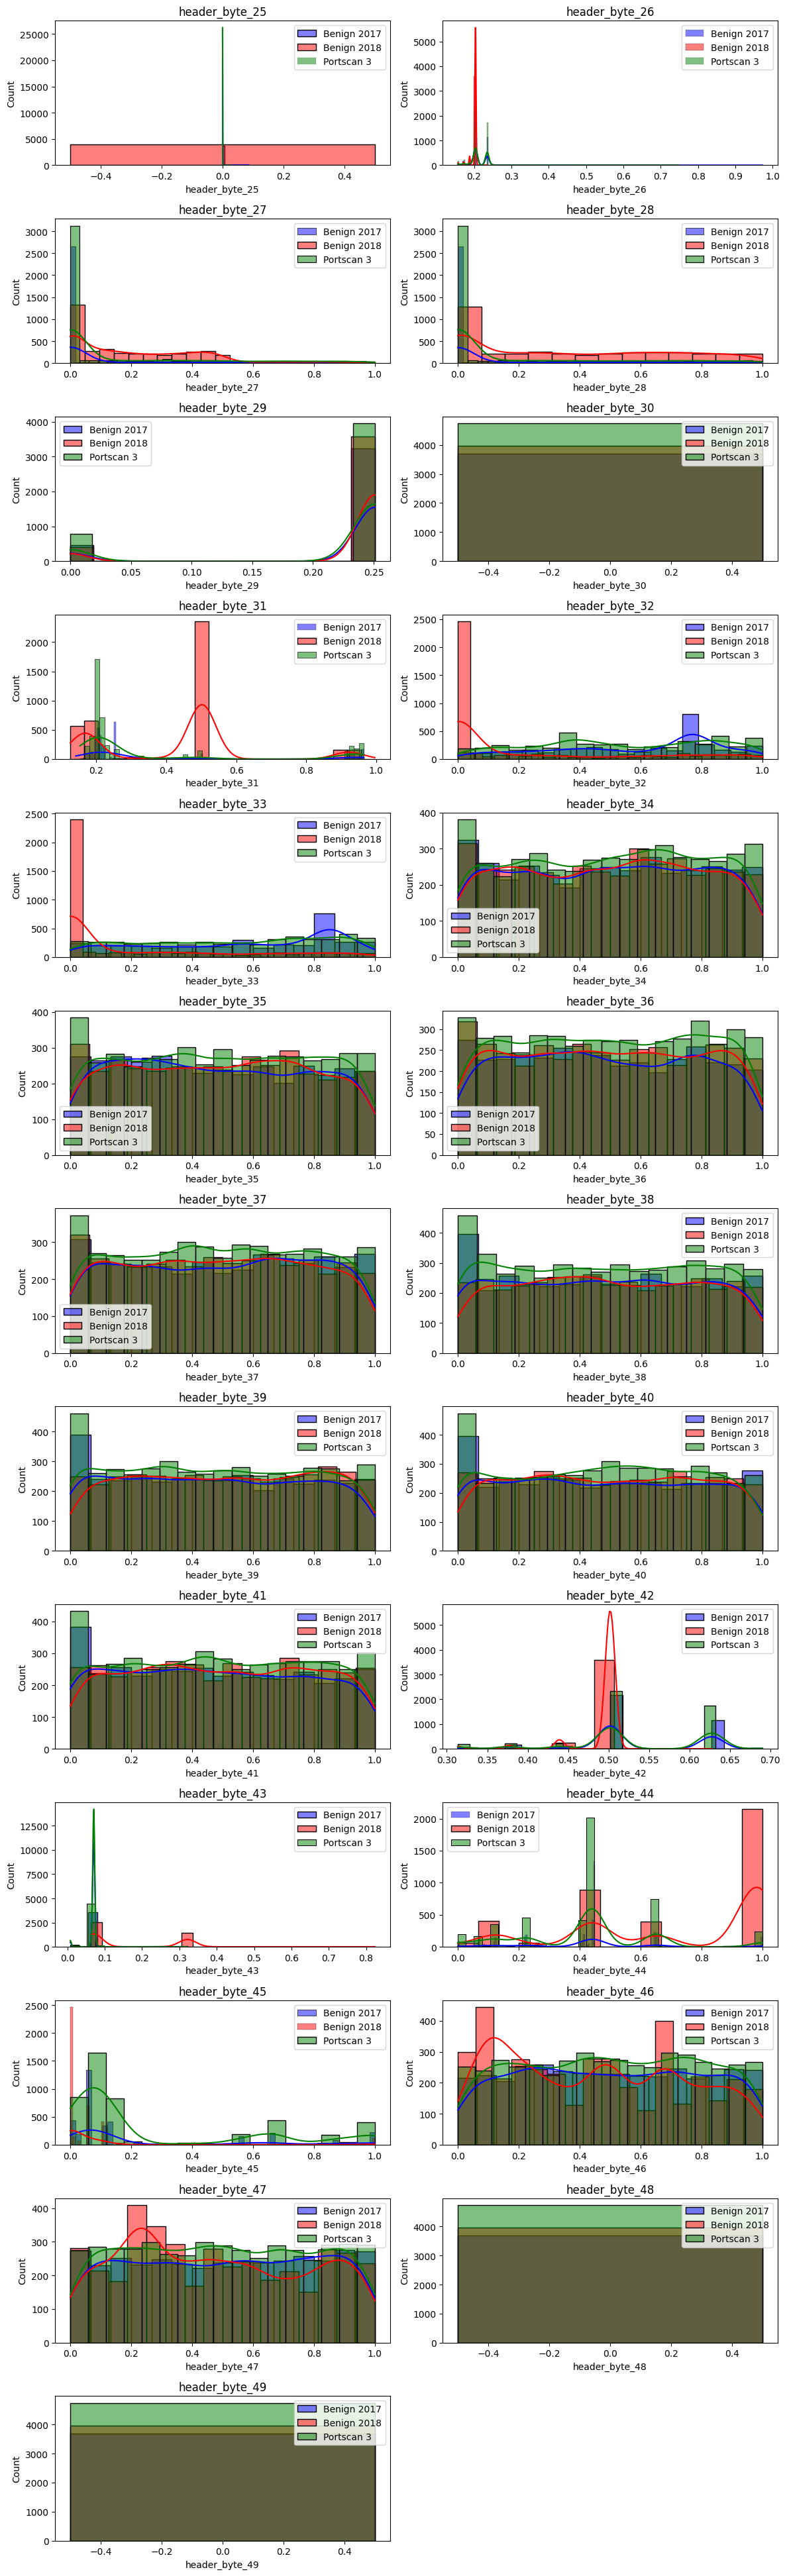

In [106]:
#start_column_index = 2  # Change this to your desired starting column index

# Extract the columns you want to visualize from both DataFrames
columns_to_plot = df1.columns[27:52]

# Set the number of subplots per row (adjust as needed)
subplots_per_row = 2

# Calculate the number of rows needed for subplots
num_rows = (len(columns_to_plot) + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 3 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through columns and create distribution plots
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    
    # Plot distribution for DataFrame 1
    sns.histplot(df1[col], ax=ax, kde=True, label='Benign 2017', color='blue')
    
    # Plot distribution for DataFrame 2
    sns.histplot(df2[col], ax=ax, kde=True, label='Benign 2018', color='red')
    
    sns.histplot(df3[col], ax=ax, kde=True, label='Portscan 3', color='green')
    
    ax.set_title(col)
    ax.legend()

# Remove empty subplots if needed
for i in range(len(columns_to_plot), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()